#### Student Name: Elad Prager
#### Student ID: 200865780

## Overview 
### Due Dec 19th

Please fill out this form to give feedback about another student's work on homework 1: https://forms.gle/Bpf9Ev76h5sJTMmZ8

If you did not complete homework 1, please only fill out the last question on the form.

## Speech Formants with Linear Predictive Coding, Vocoder (Mister Blue Sky)

Instructions: 

This notebook is an interactive assignment; please read and follow the instructions in each cell.

Assignments are to be turned in individually, you can collaborate with one classmate but EACH must turn in a copy of the homework.

Cells that require your input (in the form of code or written response) will have 'Question #' above.

After completing the assignment, please submit this notebook. Please leave the audio loaded when submitting the homework.

Upload your completed assignment on moodle.

In [1]:
# If you're collaboraing with a classmate, please fill in the following:

collaboration = {
    "200865780" : "201050135"
}



Instructions: 

* This notebook is an interactive assignment; please read and follow the instructions in each cell. 

* Cells that require your input (in the form of code or written response) will have 'Question #' above.

* After completing the assignment, please submit this notebook and its pdf printout and all sound files. 

## Speech Formants and LPC

In this section, you will synthesize vowel sounds, and investigate the frequencies in vowels from your own voice. 

Note: If you want to go above and beyond read: https://www.fon.hum.uva.nl/david/ma_ssp/doc/Klatt-1980-JAS000971.pdf
Dennis H. Klatt, "Software for a cascade/parallel formant synthesizer," JASA, vol. 67, pp. 13-33, 1980


mystery_1
mystery_2
mystery_3


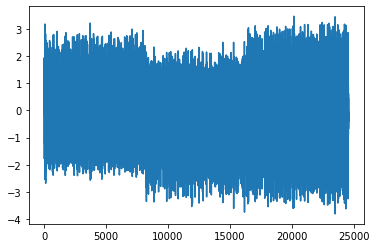

In [2]:
import numpy as np
import pandas as pd
from collections import Counter
from numpy.random import multinomial as randm
from numpy import where
import scipy.signal as si
import IPython.display as ipd
import librosa
import scipy
from matplotlib import patches
import librosa.display as ld
import music21
from music21 import midi as midi21
from music21 import stream
from scipy.io import wavfile as wavfile 
import copy
import matplotlib.pyplot as plt

Fdict = {
    'mystery_1':[[328, 2208, 2885],[27,80,575]],
    'mystery_2':[[504, 868, 2654],[62,   108,  299]],
    'mystery_3':[[700, 1220, 2600],[130,   70,  160]]
    } # Formant frequencies in Hz

def excitation(f0,jitt,dur,nharm=None,unvoiced=False):
    w0T = 2*np.pi*f0/fs

    if nharm == None:
        nharm = int((fs/2)/f0) # number of harmonics
    nsamps = int(fs*dur)
    sig = np.zeros(nsamps)
    ph = np.random.uniform(size=nsamps)*2*np.pi
    n = np.arange(nsamps)

    if unvoiced:
        sig = np.random.normal(size=nsamps)
    else:
    # Synthesize bandlimited impulse train
        for i in range(1,nharm):
            sig = sig + np.cos(i*w0T*n + jitt*ph)
    
    sig = sig/max(sig)
    return sig

def voca(sig,F,Fb):
    R = np.exp(-np.pi*Fb/fs);     # Pole radii
    theta = 2*np.pi*F/fs;     # Pole angles
    poles = R * np.exp(1j*theta) # Poles[B,A] = zpk2tf(0,np.concatenate((poles, np.conj(poles))),1) # Filter from zeros and poles
    
    [B,A] = si.zpk2tf(0,np.concatenate((poles, np.conj(poles))),1) # Filter from zeros and poles

    speech = si.lfilter(B, A, sig)
    speech = speech/np.std(speech)
    return speech,B,A

fs = 8192 # 22050  % Sampling rate in Hz ("telephone quality" for speed)

vowels = list(Fdict.keys())
f0 = 150 # Pitch in Hz
dur = 1 #one second in duration
ji = 0.1 #0.1
ex = excitation(f0,ji,dur)

text = ['mystery_1','mystery_2','mystery_3']

speech = np.zeros(1)
for t in text:
    F = np.array(Fdict[t][0])
    Fb = np.array(Fdict[t][1])
    print(t)

    vow,B,A = voca(ex,F,Fb)
    
    speech = np.concatenate((speech,vow))

speech = speech/np.std(speech)
plt.plot(speech)

In [3]:
ipd.Audio(speech, rate=fs) 

##### Question 1 (10 points)

Based on the audio output, what vowels were synthesized as mystery_1, mystery_2, and mystery_3? 
Please specify using a word; for example, if you heard an 'oo' sound as in 'hoot', you may answer with the word "hoot". 

**mystery_1: 'ee' (feed)**

**mystery_2: 'oo' (home)**

**mystery_3: 'aa' (apple)**

Now we will examine just one vowel in greater detail. 
Select one mystery vowel to analyze below: 

mystery_3


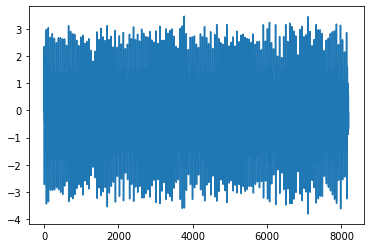

In [4]:
%matplotlib inline  

### Modify the line below:
text = ['mystery_3']

speech = np.zeros(1)
for t in text:
    F = np.array(Fdict[t][0])
    Fb = np.array(Fdict[t][1])
    print(t)

    vow,B,A = voca(ex,F,Fb)
    speech = np.concatenate((speech,vow))

speech = speech/np.std(speech)
plt.plot(speech)

In [5]:
ipd.Audio(speech, rate=fs) 


We purposely didn't talk about Power Spectral Density because it would have made hw1 too easy, but you can read about it a bit if you're unsure what it shows - https://en.wikipedia.org/wiki/Spectral_density_estimation

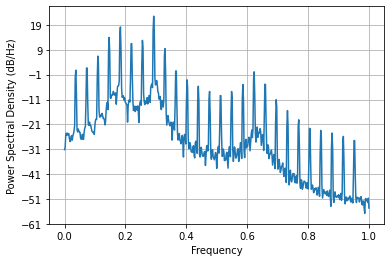

In [6]:
# Plot the power spectral density (PSD)
plt.psd(speech, 1024)
plt.show()

[ 1.         -2.03345517  2.55109742 -2.33332554  2.41202639 -1.91424567
  1.04926459 -0.27213325  0.20911987 -0.09962825  0.02894669]


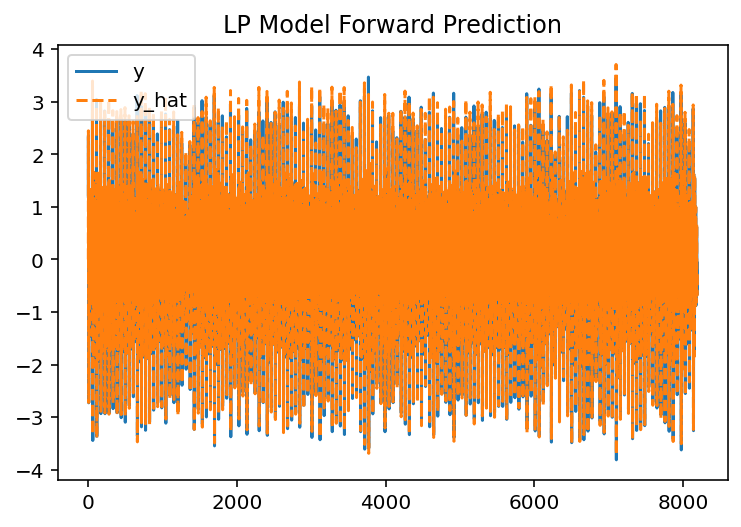

In [7]:
lpc_order = 10
s = speech

a = librosa.core.lpc(s, lpc_order)
print(a)
s_hat = scipy.signal.lfilter([0] + -1*a[1:], [1], s)
s_err = s[1:] - s_hat[:-1]
plt.plot(s[1:])
plt.plot(s_hat[:-1], linestyle='--')
plt.legend(['y', 'y_hat'])
plt.title('LP Model Forward Prediction')
plt.show()

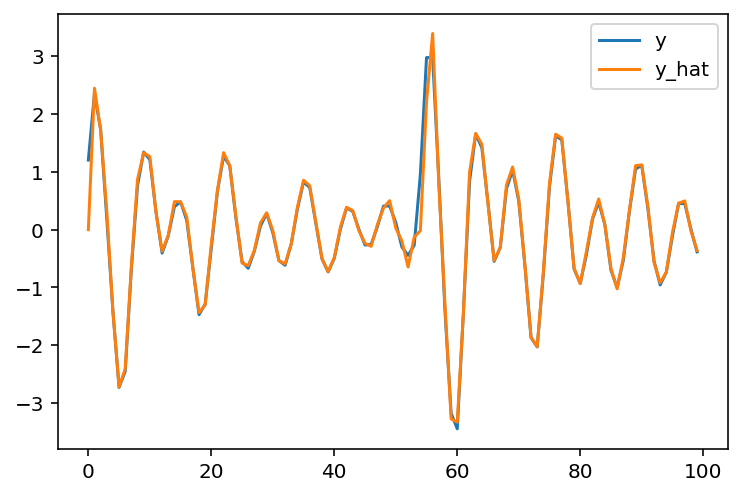

In [8]:
plt.plot(s[1:101])
plt.plot(s_hat[:100])
plt.legend(['y', 'y_hat'])
plt.show()

##### Question 2 (10 points)

What is being visualized as y and y_hat on the above plot?

``` Answer: ```

**'y' is visualizing the original sound wave, while 'y_hat' is visualizing the encoded sound wave after using LPC (Linear Predictive Coding), which is a method of digitally encoding analog audio signals. It is used to reduce the amount of data required to represent the audio signal, while still retaining its quality. It does this by predicting the next sample in the signal based on previous samples, and then encoding the difference between the prediction and the actual sample.**

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


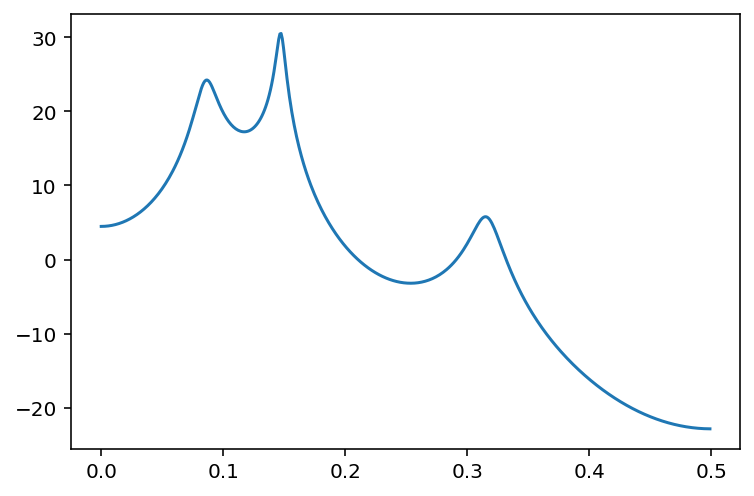

In [9]:
w,h = si.freqz(b=1,a = a, fs=1)
plt.plot(w,20*np.log10(h))

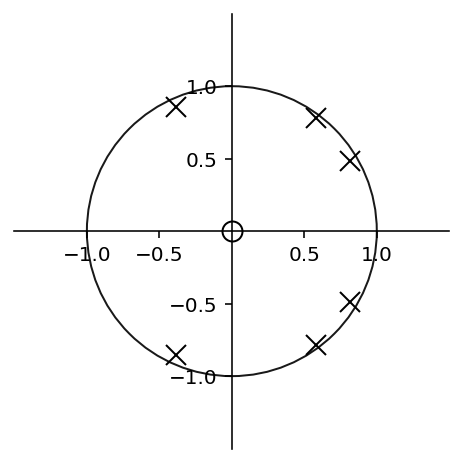

In [10]:
z,p,k = si.tf2zpk(B,A)
    
unit_circle = patches.Circle((0,0), radius=1, fill=False, color='black', ls='solid', alpha=0.9)
ax = plt.subplot(111)
ax.add_patch(unit_circle)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
r = 1.5; plt.axis('scaled'); plt.axis([-r, r, -r, r])
ticks = [-1, -.5, .5, 1]; plt.xticks(ticks); plt.yticks(ticks)    
    
plt.plot(z.real, z.imag, 'ko', fillstyle='none', ms = 10)
plt.plot(p.real, p.imag, 'kx', fillstyle='none', ms = 10)

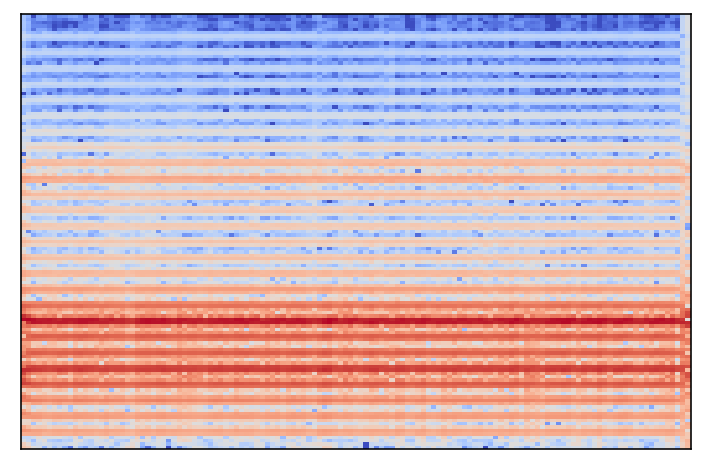

In [11]:
D = np.abs(librosa.stft(s,n_fft=256,hop_length = 64))
ld.specshow(librosa.amplitude_to_db(D))

##### Question 3 (20 points)

Record yourself speaking the same vowel sound you analyzed above. 
Graph the power spectral density (PSD) of your recording alongside the PSD of the synthetic signal. 

In [12]:
# My record
vowel, srate = librosa.load("Recording_aa.wav") 
vowel = vowel[14000:]
ipd.Audio(vowel, rate = srate) 

[ 1.         -2.4444969   2.0797505  -0.7310623   0.66403556 -1.217193
  0.8001012  -0.03982952  0.06491421 -0.24989682  0.09594771]


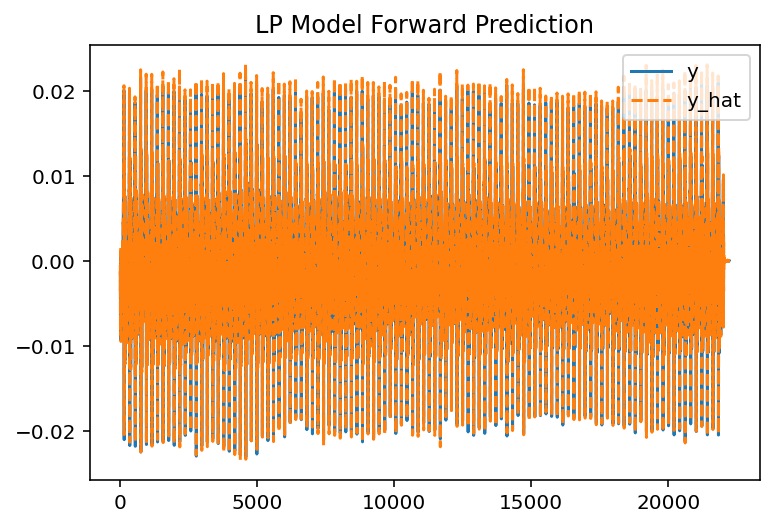

In [13]:
lpc_order = 10
s = vowel

a = librosa.core.lpc(s, lpc_order)
print(a)
s_hat = scipy.signal.lfilter([0] + -1*a[1:], [1], s)
s_err = s[1:] - s_hat[:-1]
plt.plot(s[1:])
plt.plot(s_hat[:-1], linestyle='--')
plt.legend(['y', 'y_hat'])
plt.title('LP Model Forward Prediction')
plt.show()

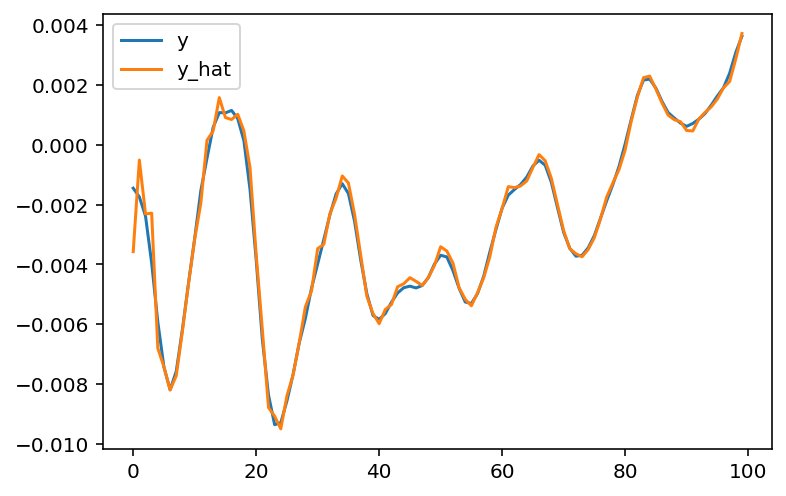

In [14]:
plt.plot(s[1:101])
plt.plot(s_hat[:100])
plt.legend(['y', 'y_hat'])
plt.show()

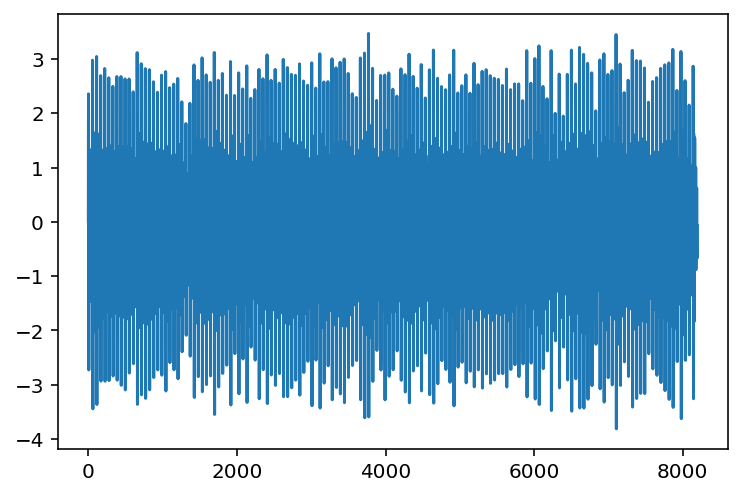

In [15]:
speech = speech/np.std(speech)
plt.plot(speech)

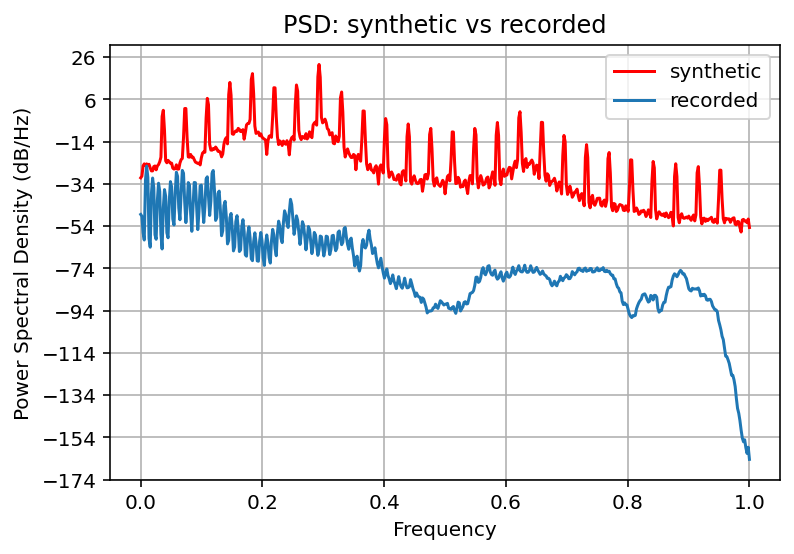

In [16]:
plt.psd(speech, 1024, color='r')
plt.psd(vowel, 1024)
plt.legend(['synthetic', 'recorded'])
plt.title('PSD: synthetic vs recorded')
plt.show()

##### Question 4 (10 points)

How does the power spectral density of your recorded signal compare to the LPC spectrum? 

**When we compare the previous PSD of the recorded signal to the first synthesized vowel, we can say that even there is some similarity between the two, the human recording is more unpredictable and complex, whereas the synthesized vowel is more predictable and consistent. Probably because the human recording have more nuance and subtlety in the timbre, while the synthesized vowel is more consistent in tone and sound, and since the human recording have a more organic and natural sound, while the synthesized vowel is more robotic and artificial.**

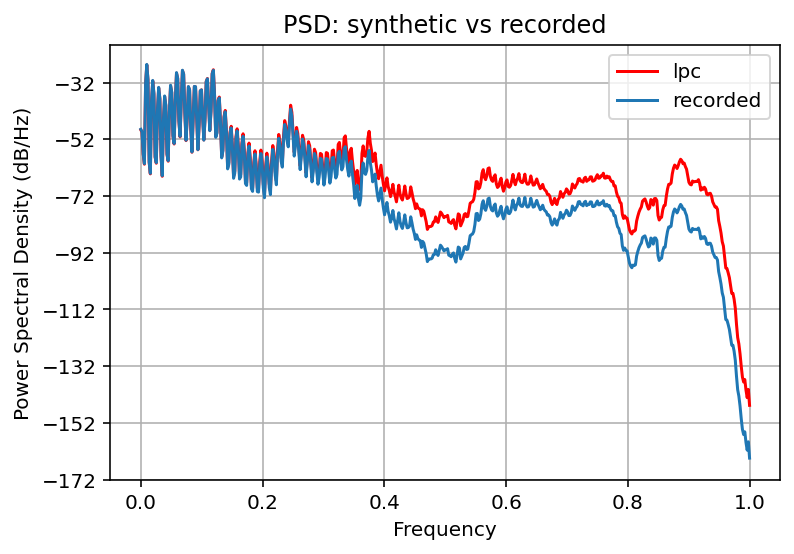

In [17]:
plt.psd(s_hat, 1024, color='r')
plt.psd(vowel, 1024)
plt.legend(['lpc', 'recorded'])
plt.title('PSD: synthetic vs recorded')
plt.show()

``` Your response here ```

**When we compare the PSD of the recorded signal to the encoded LPC, we can see the signals are similar but there is a small gap between these, meaning the lpc manged to encode the recording quite good**

# Simple Singing Vocoder

In this section we will use a spoken sound to process an excitation that plays a melody. In music such an effect is known as vocoding and it is used to produce a talking musical instrument. 

In [18]:
def lpc_to_formants(lpc, sr):    
    """Convert LPC to formants    
    """
        
    # extract roots, get angle and radius
    roots = np.roots(lpc)
    
    pos_roots = roots[np.imag(roots)>=0]
    if len(pos_roots)<len(roots)//2:
        pos_roots = list(pos_roots) + [0] * (len(roots)//2 - len(pos_roots))
    if len(pos_roots)>len(roots)//2:
        pos_roots = pos_roots[:len(roots)//2]
    
    w = np.angle(pos_roots)
    a = np.abs(pos_roots)
    
    order = np.argsort(w)
    w = w[order]
    a = a[order]
    
    freqs = w * (sr/(2*np.pi))
    bws =  -0.5 * (sr/(2*np.pi)) * np.log(a)    
    
    # exclude DC and sr/2 frequencies
    return freqs, bws

##### Questioon 5 [10 points] 

Record yourself speaking slowly the sentence "Mister Blue Sky". Plot a spectrogram of the speech sound.

In [19]:
# My record
sentence, sr = librosa.load("Mister_blue_sky.wav") 
sentence = sentence[14000:80000]
ipd.Audio(sentence, rate = sr) 

In [20]:
plt.rcParams["figure.figsize"] = (10,5)

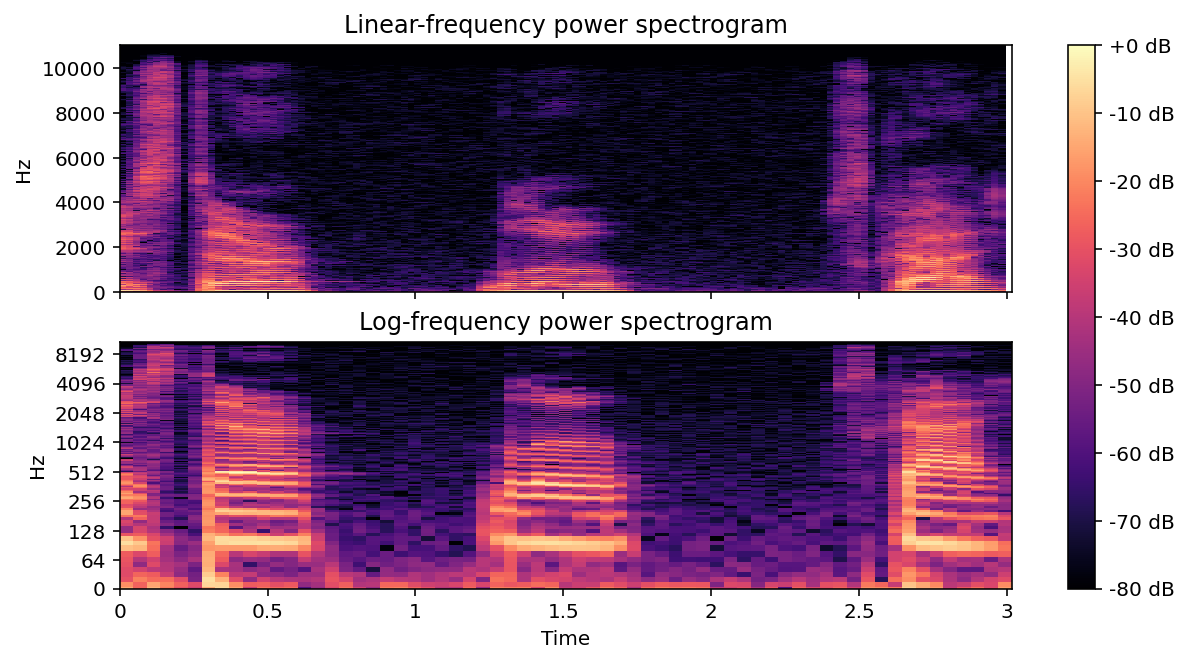

In [21]:
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True)
D = librosa.amplitude_to_db(np.abs(librosa.stft(sentence)), ref=np.max)
img = librosa.display.specshow(D, y_axis='linear', x_axis='time',
                               sr=sr, ax=ax[0])
ax[0].set(title='Linear-frequency power spectrogram')
ax[0].label_outer()

hop_length = 1024
D = librosa.amplitude_to_db(np.abs(librosa.stft(sentence, hop_length=hop_length)),
                            ref=np.max)
librosa.display.specshow(D, y_axis='log', sr=sr, hop_length=hop_length,
                         x_axis='time', ax=ax[1])
ax[1].set(title='Log-frequency power spectrogram')
ax[1].label_outer()
fig.colorbar(img, ax=ax, format="%+2.f dB")

##### Question 6 [30 points]

In this question we will create a song based on the spoken sentence you recorded. You will choose the melody by creating a sequence of pitches that change slowly over time.
Write a function that does the following:

1. Divide the speech signal into short slices (frames) of 512 samples with 50% overlap
2. For each speech segment compute formants by converting lpc_to_formants (F,Fb)
3. Choose a pitch (f0) for each segment
4. Using the voca function, create a speech sound (vow) from an excitation (ex) with that pitch
4. Overlap and add the sound segments with cross-fade window to create one long sound file 

You are free to alter the durations of the segments and choice of notes for the melody. 
Note that the notes should be relatively long (f0 should not change very often).

Cross-fade between segments can be done by applying a traingular (numpy.bartlett) or raised cosine (numpy.hanning) window to each segment before.

In [24]:
wave, sr = librosa.load("Mister_blue_sky.wav", sr=fs)
wave = wave[14000:80000]

frame_len = 512
dur = frame_len / fs
ji = 0.1
f0 = int(150)

ex = excitation(f0,ji,dur)
window = scipy.signal.hann(frame_len)
vocode = np.zeros(len(wave) + frame_len)

for i in range(0,len(wave),frame_len//2):
    wave_slice = wave[i:i+frame_len]
    a = librosa.core.lpc(wave_slice, lpc_order)
    freq, bw = lpc_to_formants(a, sr)
    F=np.array([int(x) for x in freq])
    Fb=np.array([int(x) for x in bw])
    vow,B,A = voca(ex,F,Fb)
    vocode[i:i+frame_len] += vow * window

ipd.Audio(vocode[:len(wave)], rate=sr)

##### Question 7 [10 points]

Why did we use overlapping windows for vocoder? 

**Using overlapping windows for a vocoder allows a continuous phase, along with helping to reduce artifacts and distortions that can occur when using non-overlapping windows. This is because overlapping windows allow for more accurate frequency analysis since they provide a more detailed picture of the signal, which improves the overall sound quality of the vocoder.**